## STATS 131 - Group Project
### Datasets:
* GDP_and_GDP_Per_Capita.csv (1)
* Expenditure_on_Health.csv (2)
* Production_Trade_and_Supply_of_Energy.csv (3)
* Internet_Usage.csv (4)
* Public_Expenditure_on_Education.csv (5)
* Tourist_Visitors_Arrival_and_Expenditure.csv (6)
* GDP_on_R&D.csv (7)
* Exchange_Rates.csv (8)
* Consumer_Price_Index.csv (9)

### Variables:
* response: CPI (9)
* predictors:
    - GDP (1)
    - expenditure on health (2)
    - energy usage (3)
    - Internet usage (4)
    - expenditure on education (5)
    - expenditure on tourism (6)
    - expenditure on science & technology (7)
    - exchange rate (8)
    
### Dataset sources:
United Nations: http://data.un.org/
- National accounts (1)
    - GDP and GDP per capita
- Nutrition and health (2)
    - Health expenditure
- Energy (3)
    - Energy production, trade and consumption
- Communication (4)
    - Internet usage
- Education (5)
    - Public expenditure on education
- Science and technology (7)
    - Human resources in R & D
- Finance (8)
    - Exchange rates
- Price and production indices (9)
    - Consumer price indices
   
### Objective:
To predict CPI (customer price index) of a country by using predictors that are relevant to the economic growth.

### Exploratory Data Analysis and Data Clean-up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CPI = pd.read_csv("Consumer_Price_Index.csv", encoding ="ISO-8859-1")
CPI.Series.unique()  # to extra certain rows
CPI = CPI.loc[CPI.Series == 'Consumer price index: General']
countries = CPI.Country.unique()
CPI.head()

,ID,Country,Year,Series,Value
0,4,Afghanistan,2005,Consumer price index: General,71.1
1,4,Afghanistan,2010,Consumer price index: General,100
2,4,Afghanistan,2014,Consumer price index: General,133.1
3,4,Afghanistan,2015,Consumer price index: General,132.1
4,4,Afghanistan,2016,Consumer price index: General,137.9


In [3]:
health = pd.read_csv("Expenditure_on_Health.csv", encoding ="ISO-8859-1")
health = health.loc[health.Series == 'Current health expenditure (% of GDP)']
health.head()

,ID,Country,Year,Series,Value
0,4,Afghanistan,2005,Current health expenditure (% of GDP),9.9
1,4,Afghanistan,2010,Current health expenditure (% of GDP),8.6
2,4,Afghanistan,2013,Current health expenditure (% of GDP),8.8
3,4,Afghanistan,2014,Current health expenditure (% of GDP),9.7
4,4,Afghanistan,2015,Current health expenditure (% of GDP),10.3


In [4]:
GDP = pd.read_csv("GDP_and_GDP_Per_Capita.csv", encoding ="ISO-8859-1")
gdp = GDP.loc[GDP.Series == "GDP per capita (US dollars)"]

In [5]:
energy = pd.read_csv("Production_Trade_and_Supply_of_Energy.csv", encoding ="ISO-8859-1" )
energy = energy.loc[energy.Series == "Primary energy production (petajoules)"]

In [6]:
internet = pd.read_csv("Internet_Usage.csv", encoding ="ISO-8859-1" )

In [7]:
education = pd.read_csv("Public_Expenditure_on_Education.csv", encoding ="ISO-8859-1" )
education.loc[education.Series == 'Current expenditure other than staff compensation as % of total expenditure in public institutions (%)']
education = education.loc[education.Series == "Public expenditure on education (% of government expenditure)"]

In [8]:
tourism = pd.read_csv("Tourist_Visitors_Arrival_and_Expenditure.csv", encoding ="ISO-8859-1" )
tourism = tourism.loc[tourism.Series == "Tourism expenditure (millions of US dollars)"]

In [9]:
technology = pd.read_csv("GDP_on_R&D.csv", encoding ="ISO-8859-1" )
tech = technology.loc[technology.Series == 'Gross domestic expenditure on R & D: as a percentage of GDP (%)']

In [10]:
rates = pd.read_csv("Exchange_Rates.csv", encoding ="ISO-8859-1" )
rates = rates.loc[rates.Series == "Exchange rates: period average (national currency per US dollar)"]

In [11]:
employment = pd.read_csv("Labour_Force_and_Unemployment.csv", encoding ="ISO-8859-1")
employment = employment.loc[employment.Series == "Unemployment rate - Total"]
employment = employment.pivot(index = "Year", columns = "Country", values = "Value")

In [12]:
gdp.pivot(index = "Year", columns = "Country", values = "Value").head()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Boliv. Rep. of),Viet Nam,Yemen,Zambia,Zanzibar,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1985,282.0,783.0,2564.0,9837.0,859.0,4072.0,3508.0,3144.0,NaN,6108.0,...,18017.0,1735.0,NaN,1020.0,3425.0,79.0,NaN,399.0,NaN,872.0
1995,189.0,770.0,1452.0,23359.0,466.0,10583.0,7841.0,7993.0,426.0,16442.0,...,28758.0,6609.0,589.0,1621.0,3375.0,276.0,387.0,417.0,235.0,846.0
2005,264.0,2615.0,3100.0,41281.0,1891.0,18129.0,11453.0,5125.0,1753.0,23303.0,...,44173.0,5221.0,543.0,1886.0,5433.0,684.0,925.0,691.0,408.0,481.0
2010,558.0,4056.0,4463.0,39734.0,3586.0,19459.0,12175.0,10346.0,3432.0,23513.0,...,48574.0,11938.0,1382.0,2966.0,13566.0,1310.0,1309.0,1463.0,587.0,720.0
2015,611.0,3895.0,4163.0,36040.0,4171.0,22622.0,13602.0,14853.0,3618.0,25796.0,...,56948.0,15525.0,2160.0,2871.0,11054.0,2065.0,990.0,1319.0,795.0,1033.0


In [13]:
energy.pivot(index = "Year", columns = "Country", values = "Value").head()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United States Virgin Islands,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Boliv. Rep. of),Viet Nam,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1990,19.0,99.0,4380.0,0.0,1198.0,0.0,NaN,2064.0,NaN,0.0,...,NaN,68588.0,51.0,NaN,0.0,5953.0,787.0,NaN,207.0,372.0
1995,16.0,43.0,4748.0,0.0,1585.0,0.0,NaN,2722.0,10.0,0.0,...,NaN,68963.0,45.0,2045.0,1.0,7962.0,1136.0,713.0,224.0,362.0
2000,18.0,34.0,6556.0,0.0,1803.0,0.0,NaN,3404.0,27.0,5.0,...,NaN,69339.0,46.0,2307.0,1.0,8965.0,1733.0,908.0,248.0,379.0
2005,23.0,48.0,7534.0,0.0,2934.0,0.0,NaN,3609.0,36.0,5.0,...,NaN,68124.0,45.0,2446.0,1.0,8283.0,2612.0,844.0,280.0,379.0
2010,41.0,69.0,6200.0,1.0,4085.0,0.0,0.0,3343.0,52.0,5.0,...,NaN,71893.0,89.0,2309.0,1.0,8139.0,2747.0,804.0,319.0,369.0


In [14]:
CPI = CPI.pivot(index = "Year", columns = "Country", values = "Value")
GDP = gdp.pivot(index = "Year", columns = "Country", values = "Value")
energy = energy.pivot(index = "Year", columns = "Country", values = "Value")
health = health.pivot(index = "Year", columns = "Country", values = "Value")
education = education.pivot(index = "Year", columns = "Country", values = "Value")
tech = tech.pivot(index = "Year", columns = "Country", values = "Value")
internet = internet.pivot(index = "Year", columns = "Country", values = "Value")
rates = rates.pivot(index = "Year", columns = "Country", values = "Value")
tourism = tourism.pivot(index = "Year", columns = "Country", values = "Value")

In [15]:
print(countries)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurin. State of)' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'China, Hong Kong SAR'
 'China, Macao SAR' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' 'Côte d\x92Ivoire' 'Croatia' 'Curaçao' 'Cyprus' 'Czechia'
 'Dem. Rep. of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Guiana'
 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Gibraltar' 'Greece' 'Grenada' 'Guadeloupe' 'Guam' 'Guatemala' 'Guin

In [16]:
name = 'Albania'
table = pd.DataFrame(CPI.loc[:, name])
table = table.join(pd.DataFrame(GDP.loc[:, name]), lsuffix='CPI', rsuffix='GDP')
table = table.join(pd.DataFrame(energy.loc[:, name]), lsuffix='GDP', rsuffix='Energy')
table = table.join(pd.DataFrame(tech.loc[:, name]), lsuffix = "Energy", rsuffix='Tech')
table = table.join(pd.DataFrame(education.loc[:, name]), lsuffix = "Tech", rsuffix='Education')
table = table.join(pd.DataFrame(rates.loc[:, name]), lsuffix = "Education", rsuffix='rates')
table = table.join(pd.DataFrame(internet.loc[:, name]), lsuffix = "Rates", rsuffix='Internet')
table = table.join(pd.DataFrame(tourism.loc[:, name]), lsuffix = "Internet", rsuffix='Tourism')
table = table.join(pd.DataFrame(health.loc[:, name]), lsuffix = "Tourism", rsuffix='Health')
table.fillna(method = "ffill", inplace = True)
table.fillna(method = "bfill", inplace = True)
table

,AlbaniaCPI,AlbaniaGDP,AlbaniaEnergy,AlbaniaTech,AlbaniaEducation,Albaniarates,AlbaniaInternet,AlbaniaTourism,Albania
Year,,,,,,,,,
1995,40.7,770.0,43.0,NaN,11.4,92.7,6.0,70.0,6.3
2005,86.7,2615.0,48.0,NaN,11.4,99.9,6.0,880.0,6.3
2010,100,4056.0,69.0,NaN,11.4,103.9,45.0,1778.0,5.0
2014,109.3,4056.0,85.0,NaN,11.4,105.5,60.1,1778.0,7.0
2015,111.4,3895.0,88.0,NaN,11.3,126,63.3,1613.0,6.8
2016,112.8,4061.0,82.0,NaN,11.3,124.1,66.4,1820.0,6.8
2017,115.1,4450.0,82.0,NaN,11.3,119.1,71.8,2049.0,6.8


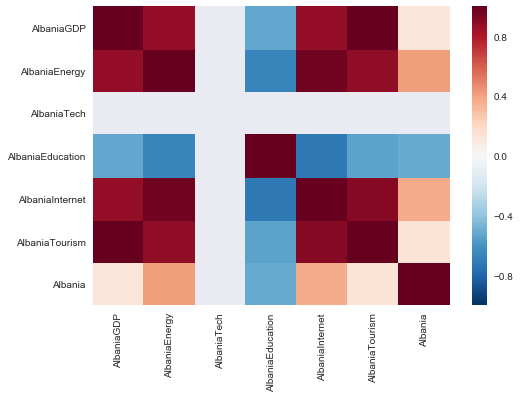

In [17]:
corr = table.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

In [18]:
name = 'Finland'
table1 = pd.DataFrame(CPI.loc[:, name])
table1 = table1.join(pd.DataFrame(GDP.loc[:, name]), lsuffix='CPI', rsuffix='GDP')
table1 = table1.join(pd.DataFrame(energy.loc[:, name]), lsuffix='GDP', rsuffix='Energy')
table1 = table1.join(pd.DataFrame(tech.loc[:, name]), lsuffix = "Energy", rsuffix='Tech')
table1 = table1.join(pd.DataFrame(education.loc[:, name]), lsuffix = "Tech", rsuffix='Education')
table1 = table1.join(pd.DataFrame(rates.loc[:, name]), lsuffix = "Education", rsuffix='rates')
table1 = table1.join(pd.DataFrame(internet.loc[:, name]), lsuffix = "Rates", rsuffix='Internet')
table1 = table1.join(pd.DataFrame(tourism.loc[:, name]), lsuffix = "Internet", rsuffix='Tourism')
table1 = table1.join(pd.DataFrame(health.loc[:, name]), lsuffix = "Tourism", rsuffix='Health')
table1.fillna(method = "ffill", inplace = True)
table1.fillna(method = "bfill", inplace = True)

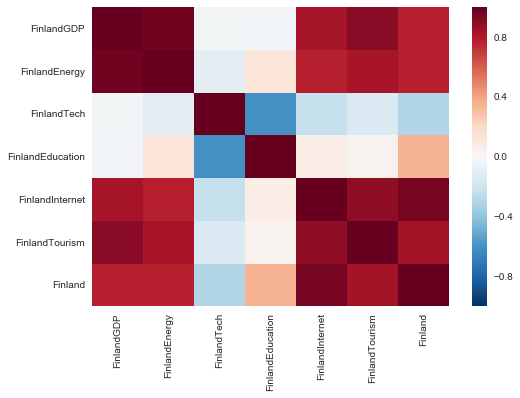

In [19]:
corr = table1.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

In [20]:
name = 'Albania'
table = pd.DataFrame(CPI.loc[:, name])
table = pd.concat([table, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                    pd.DataFrame(rates.loc[:, name]), pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                    pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
table = table.swaplevel().unstack()
table.fillna(method = "ffill", inplace = True)
table.fillna(method = "bfill", inplace = True)
table

Albania                                                 
      Energy    Tech Education Rates Internet Tourism  Health
Year                                                         
1985    40.7   783.0      99.0   0.2     92.7     0.1    70.0
1990    40.7   783.0      99.0   0.2     92.7     0.1    70.0
1995    40.7   770.0      43.0   0.2     92.7     0.1    70.0
2000    40.7   770.0      34.0   0.2     92.7     0.1    70.0
2001    40.7   770.0      34.0   0.2     92.7     0.1    70.0
2002    40.7   770.0      34.0   0.2     92.7     0.1    70.0
2003    40.7   770.0      34.0   0.2     92.7     0.1    70.0
2004    40.7   770.0      34.0   0.2     92.7     0.1    70.0
2005    86.7  2615.0      48.0   0.2     99.9     6.0   880.0
2006    86.7  2615.0      48.0   0.2     99.9     6.0   880.0
2007    86.7  2615.0      48.0   0.2     99.9     6.0   880.0
2008    86.7  2615.0      48.0   0.2     99.9     6.0   880.0
2009    86.7  2615.0      48.0   0.2     99.9     6.0   880.0
2010     100  4056.0      69.0   0.2    103.9    45.0  1778.0
2011     100  4056.0      69.0   0.2    103.9    45.0  1778.0
2012     100  4056.0      69.0   0.2    103.9    45.0  1778.0
2013     100  4056.0      69.0   0.2    103.9    45.0  1778.0
2014   109.3  4056.0      85.0   0.2    105.5    60.1  1778.0
2015   111.4  3895.0      88.0   0.2      126    63.3  1613.0
2016   112.8  4061.0      82.0   0.2    124.1    66.4  1820.0
2017   115.1  4450.0      82.0   0.2    119.1    71.8  2049.0

In [21]:
name = 'Finland'
table0 = pd.DataFrame(CPI.loc[:, name])
table0 = pd.concat([table0, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                    pd.DataFrame(education.loc[:, name]), pd.DataFrame(rates.loc[:, name]), pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                    pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
table0 = table0.swaplevel().unstack()
table0.fillna(method = "ffill", inplace = True)
table0.fillna(method = "bfill", inplace = True)
table0

Finland                                                 
      Energy     Tech Education Rates Internet Tourism Health
Year                                                         
1985      80  11385.0     504.0   3.3     12.2     0.8   37.2
1990      80  11385.0     504.0   3.3     12.2     0.8   37.2
1995      80  26215.0     549.0   3.3     12.2     0.8   37.2
2000      80  26215.0     622.0   3.3     12.2     0.8   37.2
2001      80  26215.0     622.0   3.3     12.2     0.8   37.2
2002      80  26215.0     622.0   3.3     12.2     0.8   37.2
2003      80  26215.0     622.0   3.3     12.2     0.8   37.2
2004      80  26215.0     622.0   3.3     12.2     0.8   37.2
2005    91.2  38873.0     699.0   3.3     12.2     0.8   74.5
2006    91.2  38873.0     699.0   3.3     12.2     0.8   74.5
2007    91.2  38873.0     699.0   3.3     12.2     0.8   74.5
2008    91.2  38873.0     699.0   3.3     12.2     0.8   74.5
2009    91.2  38873.0     699.0   3.3     12.2     0.8   74.5
2010     100  46181.0     727.0   3.7     11.9     0.8   86.9
2011     100  46181.0     727.0   3.7     11.9     0.8   86.9
2012     100  46181.0     727.0   3.7     11.9     0.8   86.9
2013     100  46181.0     727.0   3.7     11.9     0.8   86.9
2014     109  46181.0     759.0   3.7     12.3     0.8   86.5
2015   108.8  42405.0     734.0   2.9     12.3     0.9   86.4
2016   109.2  43439.0     738.0   2.7     12.3     0.9   87.7
2017     110  45670.0     738.0   2.7     12.3     0.9   87.5

In [22]:
name = 'Russian Federation'
table1 = pd.DataFrame(CPI.loc[:, name])
table1 = pd.concat([table1, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                    pd.DataFrame(rates.loc[:, name]), pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                    pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
table1 = table1.swaplevel().unstack()
table1.fillna(method = "ffill", inplace = True)
table1.fillna(method = "bfill", inplace = True)

In [23]:
name = 'New Zealand'
table2 = pd.DataFrame(CPI.loc[:, name])
table2 = pd.concat([table2, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                    pd.DataFrame(rates.loc[:, name]), pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                    pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
table2 = table2.swaplevel().unstack()
table2.fillna(method = "ffill", inplace = True)
table2.fillna(method = "bfill", inplace = True)

In [24]:
name = 'United Kingdom'
table3 = pd.DataFrame(CPI.loc[:, name])
table3 = pd.concat([table3, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                    pd.DataFrame(rates.loc[:, name]), pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                    pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
table3 = table3.swaplevel().unstack()
table3.fillna(method = "ffill", inplace = True)
table3.fillna(method = "bfill", inplace = True)

In [25]:
name = 'United States of America'
table4 = pd.DataFrame(CPI.loc[:, name])
table4 = pd.concat([table4, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                    pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                    pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Education", "Internet", "Tourism", "Health"])
table4 = table4.swaplevel().unstack()
table4.fillna(method = "ffill", inplace = True)
table4.fillna(method = "bfill", inplace = True)

In [26]:
name = 'China'
table5 = pd.DataFrame(CPI.loc[:, name])
table5 = pd.concat([table5, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                    pd.DataFrame(rates.loc[:, name]), pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                    pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Rates", "Internet", "Tourism", "Health"])
table5 = table5.swaplevel().unstack()
table5.fillna(method = "ffill", inplace = True)
table5.fillna(method = "bfill", inplace = True)

In [27]:
frame = pd.concat([table, table1, table2, table3, table4, table5], axis = 1)
frame.fillna(0)
frame

Albania                                                   \
      Energy    Tech Education Rates Internet Tourism  Health   
Year                                                            
1985    40.7   783.0      99.0   0.2     92.7     0.1    70.0   
1990    40.7   783.0      99.0   0.2     92.7     0.1    70.0   
1995    40.7   770.0      43.0   0.2     92.7     0.1    70.0   
2000    40.7   770.0      34.0   0.2     92.7     0.1    70.0   
2001    40.7   770.0      34.0   0.2     92.7     0.1    70.0   
2002    40.7   770.0      34.0   0.2     92.7     0.1    70.0   
2003    40.7   770.0      34.0   0.2     92.7     0.1    70.0   
2004    40.7   770.0      34.0   0.2     92.7     0.1    70.0   
2005    86.7  2615.0      48.0   0.2     99.9     6.0   880.0   
2006    86.7  2615.0      48.0   0.2     99.9     6.0   880.0   
2007    86.7  2615.0      48.0   0.2     99.9     6.0   880.0   
2008    86.7  2615.0      48.0   0.2     99.9     6.0   880.0   
2009    86.7  2615.0      48.0   0.2     99.9     6.0   880.0   
2010     100  4056.0      69.0   0.2    103.9    45.0  1778.0   
2011     100  4056.0      69.0   0.2    103.9    45.0  1778.0   
2012     100  4056.0      69.0   0.2    103.9    45.0  1778.0   
2013     100  4056.0      69.0   0.2    103.9    45.0  1778.0   
2014   109.3  4056.0      85.0   0.2    105.5    60.1  1778.0   
2015   111.4  3895.0      88.0   0.2      126    63.3  1613.0   
2016   112.8  4061.0      82.0   0.2    124.1    66.4  1820.0   
2017   115.1  4450.0      82.0   0.2    119.1    71.8  2049.0   

     Russian Federation                     ...   United States of America  \
                 Energy     Tech Education  ...                  Education   
Year                                        ...                              
1985                6.3   2713.0   40589.0  ...                    68588.0   
1990                6.3   2713.0   40589.0  ...                    68588.0   
1995                6.3   2713.0   40589.0  ...                    68963.0   
2000                6.3   2713.0   41030.0  ...                    69339.0   
2001                6.3   2713.0   41030.0  ...                    69339.0   
2002                6.3   2713.0   41030.0  ...                    69339.0   
2003                6.3   2713.0   41030.0  ...                    69339.0   
2004                6.3   2713.0   41030.0  ...                    69339.0   
2005               61.4   5372.0   50506.0  ...                    68124.0   
2006               61.4   5372.0   50506.0  ...                    68124.0   
2007               61.4   5372.0   50506.0  ...                    68124.0   
2008               61.4   5372.0   50506.0  ...                    68124.0   
2009               61.4   5372.0   50506.0  ...                    68124.0   
2010                100  10757.0   53679.0  ...                    71893.0   
2011                100  10757.0   53679.0  ...                    71893.0   
2012                100  10757.0   53679.0  ...                    71893.0   
2013                100  10757.0   53679.0  ...                    71893.0   
2014              131.2  10757.0   55400.0  ...                    83426.0   
2015              151.5   9510.0   56024.0  ...                    84051.0   
2016              162.2   8924.0   57240.0  ...                    79672.0   
2017              168.2  10956.0   57240.0  ...                    79672.0   

                                 China                                     \
     Internet Tourism    Health Energy    Tech     Rates Internet Tourism   
Year                                                                        
1985      2.5    43.1   93743.0    100   289.0   32727.0      1.3     2.9   
1990      2.5    43.1   93743.0    100   289.0   32727.0      1.3     2.9   
1995      2.5    43.1   93743.0    100   592.0   39692.0      1.3     8.4   
2000      2.5    43.1   93743.0    100   592.0   40783.0      1.3     8.4   
2001      2.5    43.1   93743.0 

In [28]:
frame.columns.swaplevel()
frame.stack()

Albania   China New Zealand Russian Federation United Kingdom  \
Year                                                                           
1985 Education      99     NaN         500              40589           8595   
     Energy       40.7     100        71.7                6.3           87.4   
     Health         70     1.8        2318               7805          27577   
     Internet     92.7     1.3           2               28.3            0.8   
     Rates         0.2   32727         1.1                1.1            1.6   
     Tech          783     289        7376               2713           8665   
     Tourism       0.1     2.9        47.4                  2           26.8   
1990 Education      99     NaN         500              40589           8595   
     Energy       40.7     100        71.7                6.3           87.4   
     Health         70     1.8        2318               7805          27577   
     Internet     92.7     1.3           2               28.3            0.8   
     Rates         0.2   32727         1.1                1.1            1.6   
     Tech          783     289        7376               2713           8665   
     Tourism       0.1     2.9        47.4                  2           26.8   
1995 Education      43     NaN         544              40589          10588   
     Energy       40.7     100        71.7                6.3           87.4   
     Health         70     1.8        2318               7805          27577   
     Internet     92.7     1.3         1.5               28.3            0.6   
     Rates         0.2   39692         1.1                1.1            1.6   
     Tech          770     592       17184               2713          23042   
     Tourism       0.1     8.4        47.4                  2           26.8   
2000 Education      34     NaN         628              41030          11247   
     Energy       40.7     100        71.7                6.3           87.4   
     Health         70     1.8        2318               7805          27577   
     Internet     92.7     1.3         1.5               28.3            0.6   
     Rates         0.2   40783         1.1                1.1            1.6   
     Tech          770     592       17184               2713          23042   
     Tourism       0.1     8.4        47.4                  2           26.8   
2001 Education      34     NaN         628              41030          11247   
     Energy       40.7     100        71.7                6.3           87.4   
...                ...     ...         ...                ...            ...   
2013 Tech         4056    4487       33543              10757          38746   
     Tourism        45     6.8        80.5                 43             85   
2014 Education      85     NaN         779              55400           4464   
     Energy      109.3   113.2       107.6              131.2          111.8   
     Health       1778    47.9        6523              13239          40526   
     Internet    105.5     1.7         1.2               38.4            0.6   
     Rates         0.2  101498         1.3                1.1            1.7   
     Tech         4056    4487       33543              10757          38746   
     Tourism      60.1     6.1        85.5               70.5           91.6   
2015 Education      88     NaN         774              56024           4897   
     Energy      111.4   114.9       107.9              151.5          111.9   
     Health       1613    50.3        9452              13204          65454   
     Internet      126     1.7         1.4               60.9            0.7   
     Rates         0.2  100864         1.3                1.1            1.7   
     Tech         3895    7920       38402               9510          44290   
     Tourism      63.3     6.2        88.2               70.1             92   
2016 Education      82     NaN         758              57240           4968   
     Energy    

## Data Modeling:
### Response variable:
- CPI

### Predictor variables:
- Country ID (factor with 12 levels)
    - G7 countries: United States of America, Germany, France, Japan, Canada, United Kingdon and Italy
    - BRICS countires: Brazil, Russia, India, China and South Africa
- Year (factor with 7 levels)
    - 1995, 2005, 2010, 2014, 2015, 2016, 2017
- GDP
- Energy expenditure
- Technology expenditure
- Eductaion expenditure
- Exchange rates
- Internet usage rate
- Tourism expenditure
- Healthcare expenditure

In [29]:
rates["United States of America"] = 1
education["China"] = np.nan
# years = [1985, 1990, 1995, 2000, 2005, 2010, 2014, 2015, 2016, 2017]
years = CPI.index

In [30]:
# G7 countires: United States of America, Germany, France, Japan, Canada, United Kingdon and Italy
# BRICS countires: Brazil, Russia, India, China and South Africa
G7 = ["United States of America", "Germany", "France", "Japan", "Canada", "United Kingdom", "Italy"]
BRICS = ["Brazil", "Russian Federation", "India", "China", "South Africa"]
df1 = pd.DataFrame()
for name in G7: 
    table = pd.DataFrame(CPI.loc[years, name])
    table = pd.concat([table, pd.DataFrame(GDP.loc[years, name]), pd.DataFrame(energy.loc[years, name]), pd.DataFrame(tech.loc[years, name]), 
                       pd.DataFrame(education.loc[years, name]), pd.DataFrame(rates.loc[years, name]), pd.DataFrame(internet.loc[years, name]), pd.DataFrame(tourism.loc[years, name]),
                       pd.DataFrame(health.loc[years, name])], keys = ["CPI", "GDP", "Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
    table = table.swaplevel().unstack()
    table.fillna(method = "ffill", inplace = True)
    table.fillna(method = "bfill", inplace = True)
    df1 = pd.concat([df1, table], axis = 1)
    
df2 = pd.DataFrame()
for name in BRICS: 
    table = pd.DataFrame(CPI.loc[years, name])
    table = pd.concat([table, pd.DataFrame(GDP.loc[years, name]), pd.DataFrame(energy.loc[years, name]), pd.DataFrame(tech.loc[years, name]), 
                       pd.DataFrame(education.loc[years, name]), pd.DataFrame(rates.loc[years, name]), pd.DataFrame(internet.loc[years, name]), pd.DataFrame(tourism.loc[years, name]),
                       pd.DataFrame(health.loc[years, name])], keys = ["CPI", "GDP", "Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
    table = table.swaplevel().unstack()
    table.fillna(method = "ffill", inplace = True)
    table.fillna(method = "bfill", inplace = True)
    df2 = pd.concat([df2, table], axis = 1)
    
df1.fillna(0, inplace = True)
df2.fillna(0, inplace = True)

In [31]:
df1

United States of America                                                  \
                          CPI      GDP   Energy Tech Education Rates Internet   
Year                                                                            
1995                     69.9  28758.0  68963.0  2.5      13.1     1     68.0   
2005                     89.6  44173.0  68124.0  2.5      13.1     1     68.0   
2010                      100  48574.0  71893.0  2.7      13.1     1     71.7   
2014                    108.6  48574.0  83426.0  2.7      13.5     1     73.0   
2015                    108.7  56948.0  84051.0  2.7      13.5     1     74.6   
2016                    110.1  58064.0  79672.0  2.7      13.5     1     75.2   
2017                    112.4  60055.0  79672.0  2.7      13.5     1     75.2   

                      Germany  ...   United Kingdom  Italy                   \
       Tourism Health     CPI  ...           Health    CPI      GDP  Energy   
Year                           ...                                            
1995   93743.0   14.5    80.5  ...              7.2   71.6  20449.0  1235.0   
2005  122077.0   14.5    92.5  ...              7.2     91  31503.0  1269.0   
2010  167996.0   16.4     100  ...              8.5    100  35578.0  1384.0   
2014  167996.0   16.5   106.6  ...              9.8  107.4  35578.0  1539.0   
2015  249183.0   16.8   106.9  ...              9.9  107.5  30792.0  1509.0   
2016  246172.0   16.8   107.4  ...              9.9  107.4  31451.0  1408.0   
2017  251361.0   16.8   109.3  ...              9.9  108.7  32747.0  1408.0   

                                                    
     Tech Education Rates Internet  Tourism Health  
Year                                                
1995  1.0       9.0   0.8     35.0  30411.0    8.4  
2005  1.0       9.0   0.8     35.0  38373.0    8.4  
2010  1.2       8.7   0.8     53.7  38438.0    9.0  
2014  1.2       8.0   0.8     55.6  38438.0    9.0  
2015  1.3       8.0   0.9     58.1  39420.0    9.0  
2016  1.3       8.0   0.9     61.3  40373.0    9.0  
2017  1.3       8.0   0.9     61.3  44548.0    9.0  

[7 rows x 63 columns]

In [32]:
df2

Brazil                                                                 \
        CPI      GDP   Energy Tech Education Rates Internet Tourism Health   
Year                                                                         
1995   36.6   4794.0   5038.0  1.0      11.3   0.9     21.0  1085.0    8.0   
2005   79.5   4770.0   8344.0  1.0      11.3   2.4     21.0  4168.0    8.0   
2010    100  11224.0  10050.0  1.2      14.6   1.8     40.7  5522.0    8.0   
2014  126.9  11224.0  10965.0  1.2      15.7   2.4     54.6  5522.0    8.4   
2015  138.4   8750.0  11842.0  1.3      15.7   3.3     58.3  6254.0    8.9   
2016  150.4   8634.0  12183.0  1.3      15.7   3.5     60.9  6613.0    8.9   
2017  155.7   9821.0  12183.0  1.3      15.7   3.2     67.5  6175.0    8.9   

     Russian Federation  ...    China South Africa                       \
                    CPI  ...   Health          CPI     GDP  Energy Tech   
Year                     ...                                              
1995                6.3  ...      4.3         43.4  3741.0  5691.0  0.9   
2005               61.4  ...      4.3         74.3  5280.0  6583.0  0.9   
2010                100  ...      4.5          100  7276.0  6798.0  0.7   
2014              131.2  ...      5.0        124.6  7276.0  6958.0  0.7   
2015              151.5  ...      5.3        130.3  5743.0  6822.0  0.8   
2016              162.2  ...      5.3        138.9  5280.0  6858.0  0.8   
2017              168.2  ...      5.3        146.1  6151.0  6858.0  0.8   

                                               
     Education Rates Internet  Tourism Health  
Year                                           
1995      19.9   3.6      7.5   2654.0    6.7  
2005      19.9   6.4      7.5   8629.0    6.7  
2010      18.0   7.3     24.0  10309.0    7.4  
2014      19.1  10.9     49.0  10309.0    7.9  
2015      19.1  12.8     51.9   9140.0    8.2  
2016      18.1  14.7     54.0   8807.0    8.2  
2017      18.1  13.3     56.2   9699.0    8.2  

[7 rows x 45 columns]